## Module Dependency

In [1]:
%matplotlib inline
# %matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

plt.rcParams['figure.figsize'] = (10.0, 8.0)

## Read the image and show it

Format: JPEG, Size: (1000, 750), Mode: RGB


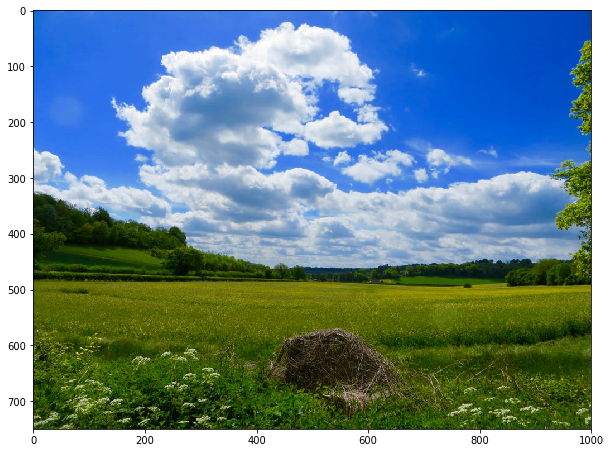

In [2]:
image = Image.open('./data/input2.jpeg')

print('Format: {}, Size: {}, Mode: {}'.format(image.format, image.size, image.mode))
plt.imshow(image)

## Transfer into numpy array and show the shape

In [3]:
new_image = np.asarray(image).astype('float32')
new_image.shape

(750, 1000, 3)

## Resahpe to (height\*width, 3)

In [4]:
new_image = new_image.reshape(-1, 3)

## Autumn Style
1. Pick out grassland and tree area
2. Exchange red value and blue value
3. Multiply some weight to fit autumn style

In [5]:
new_image[(new_image[:, 2] < 100)] = np.array([
    new_image[(new_image[:, 2] < 100), 1] * 1.1,
    new_image[(new_image[:, 2] < 100), 0] * 0.9,
    new_image[(new_image[:, 2] < 100), 2] * 0.9
]).transpose()
# new_image = np.array([
#     new_image[:, 1],
#     new_image[:, 0],
#     new_image[:, 2]
# ]).transpose()
new_image.shape

(750000, 3)

4. Pick out sky area and decrease brightness of it

In [6]:
new_image[(new_image[:, 0] >= 0) & (new_image[:, 1] >= 0) & (new_image[:, 2] >= 100)] = np.array([
    new_image[(new_image[:, 0] >= 0) & (new_image[:, 1] >= 0) & (new_image[:, 2] >= 100), 0] * 0.85,
    new_image[(new_image[:, 0] >= 0) & (new_image[:, 1] >= 0) & (new_image[:, 2] >= 100), 1] * 0.85,
    new_image[(new_image[:, 0] >= 0) & (new_image[:, 1] >= 0) & (new_image[:, 2] >= 100), 2] * 0.85
]).transpose()
new_image.shape

(750000, 3)

## Truncate some values not in normal range and print the image

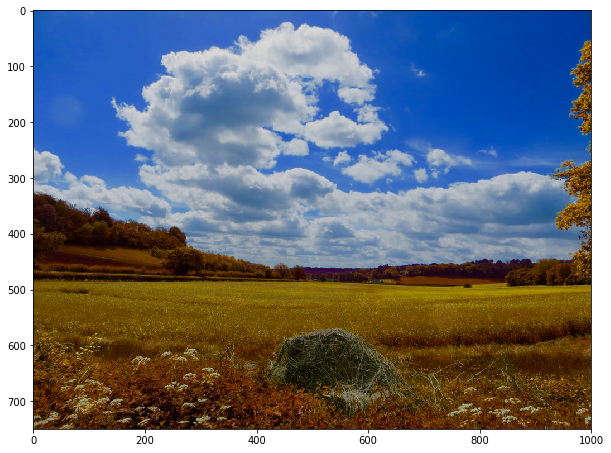

In [7]:
new_image = new_image.reshape(750, 1000, 3)
new_image[new_image > 255] = 255
new_image[new_image < 0] = 0
new_image = new_image.astype('uint8')
plt.imshow(new_image)

## Save the file

In [8]:
image = Image.fromarray(new_image)
image.save('./data/trans.jpeg')